# Q1 Import necessary libraries and load the dataset

In [ ]:
%pip install pandas seaborn matplotlib numpy

In [113]:
# Q1(a)
# Import necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Optional for displaying full dataframes
pd.set_option('display.max_columns', None)



In [114]:
# Q1(b)

import pandas as pd

# Load the CSV file with encoding ISO-8859-1

df = pd.read_csv('GC100.csv', encoding='ISO-8859-1')
print(df)





    Rank Previous Rank                      Company                Location  \
0      1            14                     Sims Ltd       Mascot, Australia   
1      2             3                 Brambles Ltd       Sydney, Australia   
2      3             2      Vestas Wind Systems A/S         Aarhus, Denmark   
3      4             9  Taiwan High Speed Rail Corp          Taipei, Taiwan   
4      5           NaN                    Nordex SE        Hamburg, Germany   
..   ...           ...                          ...                     ...   
95    96            92            IGM Financial Inc        Winnipeg, Canada   
96    97           NaN                Biomérieux SA  Marcy lÉtoile, France   
97    98           NaN      Manulife Financial Corp         Toronto, Canada   
98    99            57             Sino Land Co Ltd        Hong Kong, China   
99   100           NaN                  Sysmex Corp             Kobe, Japan   

                                             Indust

In [115]:
# Q1(c)
# Display the first row to verify it has been loaded correctly

df.head(1)



,Rank,Previous Rank,Company,Location,Industry,Revenue,Profit %,CEO Pay Ratio,Women on Board %,Women in Leadership %,Women in Workforce %,Climate Grade,Sustainability Initiatives
0,1,14,Sims Ltd,"Mascot, Australia",Waste management,"$ 38,525",16%,36:01,38%,100%,100%,A+,NaN


# Q2 Examine and clean the data

In [116]:
# Q2(a)
# Examine the data

df.info()
df.describe()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Rank                        100 non-null    int64 
 1   Previous Rank               68 non-null     object
 2   Company                     100 non-null    object
 3   Location                    100 non-null    object
 4   Industry                    100 non-null    object
 5   Revenue                     96 non-null     object
 6   Profit %                    100 non-null    object
 7   CEO Pay Ratio               82 non-null     object
 8   Women on Board %            100 non-null    object
 9   Women in Leadership %       100 non-null    object
 10  Women in Workforce %        100 non-null    object
 11  Climate Grade               99 non-null     object
 12  Sustainability Initiatives  73 non-null     object
dtypes: int64(1), object(12)
memory usage: 10.3+ KB


,Rank
count,100.000000
mean,50.500000
std,29.011492
min,1.000000
25%,25.750000
50%,50.500000
75%,75.250000
max,100.000000


In [117]:
# Q2(b)
# Clean the 'Women in Leadership %', and 'Women on Board %' columns by removing '%' and changing their data types

df['Women on Board %'] = df['Women on Board %'].astype(str).str.replace('%', '', regex=False)
df['Women in Leadership %'] = df['Women in Leadership %'].astype(str).str.replace('%', '', regex=False)
df['Women in Workforce %'] = df['Women in Workforce %'].astype(str).str.replace('%', '', regex=False)

# Convert the cleaned columns to float
df['Women on Board %'] = pd.to_numeric(df['Women on Board %'], errors='coerce').astype(float)
df['Women in Leadership %'] = pd.to_numeric(df['Women in Leadership %'], errors='coerce').astype(float)
df['Women in Workforce %'] = pd.to_numeric(df['Women in Workforce %'], errors='coerce').astype(float)



In [128]:
# Q2(c)
# verify if the data types have been changed
# Re-examine to ensure changes have been made
df.info()
df.describe()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Rank                        100 non-null    int64  
 1   Previous Rank               68 non-null     object 
 2   Company                     100 non-null    object 
 3   Location                    100 non-null    object 
 4   Industry                    100 non-null    object 
 5   Revenue                     96 non-null     object 
 6   Profit %                    100 non-null    object 
 7   CEO Pay Ratio               82 non-null     object 
 8   Women on Board %            100 non-null    float64
 9   Women in Leadership %       100 non-null    float64
 10  Women in Workforce %        100 non-null    float64
 11  Climate Grade               99 non-null     object 
 12  Sustainability Initiatives  73 non-null     object 
dtypes: float64(3), int64(1), object(9)
m

,Rank,Women on Board %,Women in Leadership %,Women in Workforce %
count,100.000000,100.000000,100.000000,100.000000
mean,50.500000,34.350000,50.660000,46.170000
std,29.011492,13.697581,36.033436,43.465081
min,1.000000,0.000000,2.000000,0.000000
25%,25.750000,25.000000,16.000000,0.750000
50%,50.500000,38.000000,47.000000,31.500000
75%,75.250000,45.000000,94.000000,100.000000
max,100.000000,58.000000,100.000000,100.000000


In [119]:
# Q2(d)
df[['Women on Board %', 'Women in Leadership %', 'Women in Workforce %']].head()

,Women on Board %,Women in Leadership %,Women in Workforce %
0,38.0,100.0,100.0
1,36.0,100.0,100.0
2,42.0,100.0,100.0
3,15.0,100.0,100.0
4,33.0,100.0,100.0


# Q3 Data Analysis

In [120]:
# Q3(a)
# Calculate the average percentage of women in leadership, workforce, and on the board.

avg_women_leadership = df['Women in Leadership %'].mean()
avg_women_workforce = df['Women in Workforce %'].mean()
avg_women_board = df['Women on Board %'].mean()






In [136]:
# Q3(a)# 
#Print the average percentage of women in leadership, workforce, and on the board.
# Display the results
print(f"Average Women in Leadership: {avg_women_leadership:.2f}%")
print(f"Average Women in Workforce: {avg_women_workforce:.2f}%")
print(f"Average Women on Board: {avg_women_board:.2f}%")

Average Women in Leadership: 50.66%
Average Women in Workforce: 46.17%
Average Women on Board: 34.35%


In [137]:
# Q3(b)
# Filter companies with SBTi initiative

sbti_companies = df[df['Sustainability Initiatives'].str.contains('SBTi', na=False)]
print(f"Number of companies with SBTi: {sbti_companies.shape[0]}")



Number of companies with SBTi: 67


In [138]:
# Q3(b)
# Save sbti_companies to a new file and name it 'Response.csv'.

sbti_companies.to_csv('sbti_companiesResponse.csv', index=False)

In [124]:
# Q3(c)
#Filter and display only those companies based in "Australia." Display the fields showing gender diversity and climate grades.

australia_companies = df[df['Location'].str.contains('Australia')]

# Display relevant columns
australia_companies[['Women on Board %', 'Women in Leadership %', 'Women in Workforce %', 'Climate Grade']]



,Women on Board %,Women in Leadership %,Women in Workforce %,Climate Grade
0,38.0,100.0,100.0,A+
1,36.0,100.0,100.0,A


In [125]:
# Q3(d)
# Analyze the distribution of companies based on their climate grade. 

# Count the number of companies by climate grade

# Show distribution of companies based on their climate grade
climate_grade_distribution = df['Climate Grade'].value_counts()

# Display the distribution
print(climate_grade_distribution)



Climate Grade
C+    19
B     18
C     18
B-    15
B+    13
A-     6
C-     5
A      4
A+     1
Name: count, dtype: int64


# Q4 Data Visualization

<Figure size 1400x800 with 0 Axes>

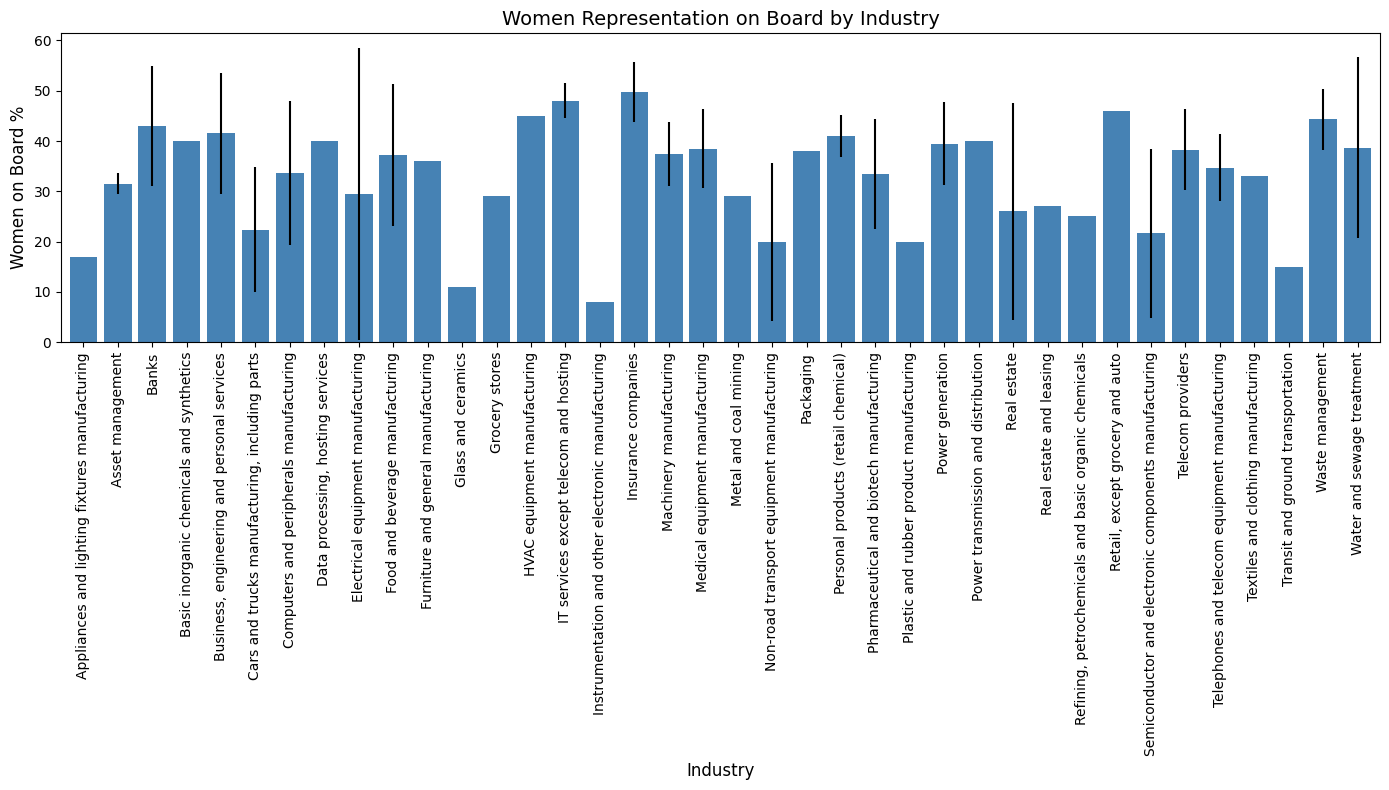

In [139]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset here (assuming 'df' is already loaded)

# Ensure the relevant columns are converted to strings before replacing the '%' sign
df['Women on Board %'] = df['Women on Board %'].astype(str).str.replace('%', '', regex=False)

# Convert the cleaned column to numeric, using 'coerce' to handle any non-numeric values
df['Women on Board %'] = pd.to_numeric(df['Women on Board %'], errors='coerce')

# Group by Industry and calculate the mean of the 'Women on Board %' representation column
industries_mean = df.groupby('Industry')[['Women on Board %']].mean()

# Calculate the standard deviation for the error bars
industries_std = df.groupby('Industry')[['Women on Board %']].std()

# Drop any rows with NaN values in the grouped data
industries_mean = industries_mean.dropna()
industries_std = industries_std.dropna()

# Set up a plot that includes error bars without caps (horizontal lines at the ends)
plt.figure(figsize=(14, 8))  # Increase the figure size for better readability

# Generate bar plot with error bars, and remove caps (horizontal lines)
ax = industries_mean.plot(kind='bar', yerr=industries_std, capsize=0, figsize=(14, 8), width=0.8, 
                          legend=False, color='steelblue',  
                          error_kw={'elinewidth': 1.5, 'capthick': 0})

# Title and labels
plt.title('Women Representation on Board by Industry', fontsize=14)
plt.ylabel('Women on Board %', fontsize=12)
plt.xlabel('Industry', fontsize=12)

# Customize x-axis ticks for better readability
plt.xticks(rotation=90, ha='center', fontsize=10)  # Rotate x-axis labels vertically for better spacing

# Tight layout to avoid label cut-off
plt.tight_layout()

# Display the plot
plt.show()


C:\Users\Arsalan Ayaz\AppData\Local\Temp\ipykernel_4624\3439211008.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Climate Grade', y='count', data=climate_grade_distribution, palette=colors)


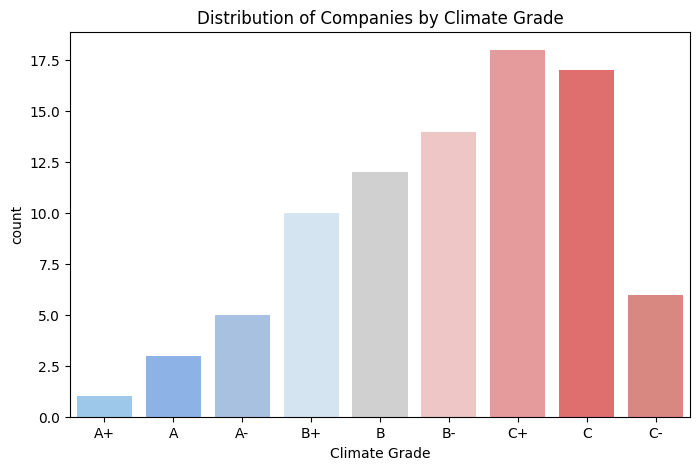

In [143]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'climate_grade_distribution' is already calculated

# Manually specify the climate grades and their counts
climate_grades = ['A+', 'A', 'A-', 'B+', 'B', 'B-', 'C+', 'C', 'C-']
counts = [1, 3, 5, 10, 12, 14, 18, 17, 6]  # Adjust the numbers to match your data

# Create a DataFrame from these values
climate_grade_distribution = pd.DataFrame({'Climate Grade': climate_grades, 'count': counts})

# Set the color palette to match the image
colors = ['#92c9f5', '#7eb1f5', '#a0bfea', '#d1e4f5', '#d0d0d0', '#f5bfbf', '#f28e8e', '#f25b5b', '#e67c73']

# Create the bar plot with specific colors and grades in the specified order
plt.figure(figsize=(8, 5))  # Match the figure size

sns.barplot(x='Climate Grade', y='count', data=climate_grade_distribution, palette=colors)

# Title and labels (customized to match your image)
plt.title('Distribution of Companies by Climate Grade', fontsize=12)
plt.xlabel('Climate Grade', fontsize=10)
plt.ylabel('count', fontsize=10)



# Show the plot
plt.show()
